In [8]:
import pandas as pd 

data = pd.read_csv("C:/Users/charl/OneDrive - Worcester Polytechnic Institute (wpi.edu)/Desktop/fuel_emissions2csv.csv", low_memory=False)
dfClean = pd.DataFrame(data)
yearly_mean_methane = dfClean.groupby("Report Year")["Fuel Methane (CH4) emissions (mt CO2e)"].mean()
yearly_mean_n2o = dfClean.groupby("Report Year")["Fuel Nitrous Oxide (N2O) emissions (mt CO2e)"].mean()


dfClean1 = dfClean.copy()
dfClean1["Yearly Methane Avg"] = dfClean["Report Year"].map(yearly_mean_methane) #add yearly means for methane and no2 to data
dfClean1["Yearly NO2 Avg"] = dfClean["Report Year"].map(yearly_mean_n2o)
dfClean1.to_csv("fuel_cleaned_cities.csv", index=False)


## Isolating Texas Data


In [9]:
texas_data = dfClean1[dfClean1["State"] == "TX"]
display(texas_data)

,City,State,Report Year,Industry Type (sectors),Fuel Type,Fuel Methane (CH4) emissions (mt CO2e),Fuel Nitrous Oxide (N2O) emissions (mt CO2e),Yearly Methane Avg,Yearly NO2 Avg
143248,Plains,TX,2021,Other,Natural Gas,7.50,8.940,206.549419,427.636717
143249,BROWNWOOD,TX,2021,Other,Natural Gas,13.25,15.794,206.549419,427.636717
143250,BROWNWOOD,TX,2020,Other,Natural Gas,13.75,16.390,193.252744,394.895964
143251,BROWNWOOD,TX,2019,Other,Natural Gas,14.25,16.986,219.034015,447.605925
143252,BROWNWOOD,TX,2018,Other,Natural Gas,16.25,19.370,235.010301,486.694558
...,...,...,...,...,...,...,...,...,...
171415,Briscoe,TX,2015,Petroleum and Natural Gas Systems,Natural Gas,16.00,19.072,249.086826,515.868020
171416,Briscoe,TX,2014,Petroleum and Natural Gas Systems,Natural Gas,15.50,18.476,267.706288,565.918155
171417,Briscoe,TX,2013,Petroleum and Natural Gas Systems,Natural Gas,20.25,24.138,260.157057,584.244783
171418,Briscoe,TX,2012,Petroleum and Natural Gas Systems,Natural Gas,22.00,26.224,292.889998,616.704598


In [12]:
tx_industry_counts = texas_data["Industry Type (sectors)"].value_counts()
print(tx_industry_counts)

Petroleum and Natural Gas Systems    8441
Chemicals                            6788
Power Plants                         5834
Refineries                           3839
Other                                1899
Minerals                              632
Pulp and Paper                        344
Waste                                 214
Metals                                181
Name: Industry Type (sectors), dtype: int64


## Plots

Count of industries in texas

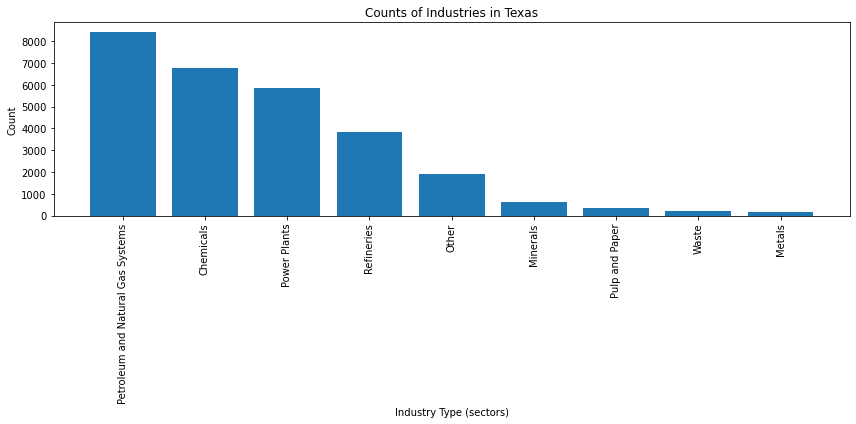

In [14]:
import matplotlib.pyplot as plt

tx_industry_counts_df = industry_counts.reset_index()
tx_industry_counts_df.columns = ["Industry Type (sectors)", "Count"]

# Sort the DataFrame by count in descending order for a better visualization
tx_industry_counts_df = tx_industry_counts_df.sort_values(by="Count", ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(tx_industry_counts_df["Industry Type (sectors)"], tx_industry_counts_df["Count"])
plt.xlabel("Industry Type (sectors)")
plt.ylabel("Count")
plt.title("Counts of Industries in Texas")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()






Map of Texas with distribution of industries based on cities 

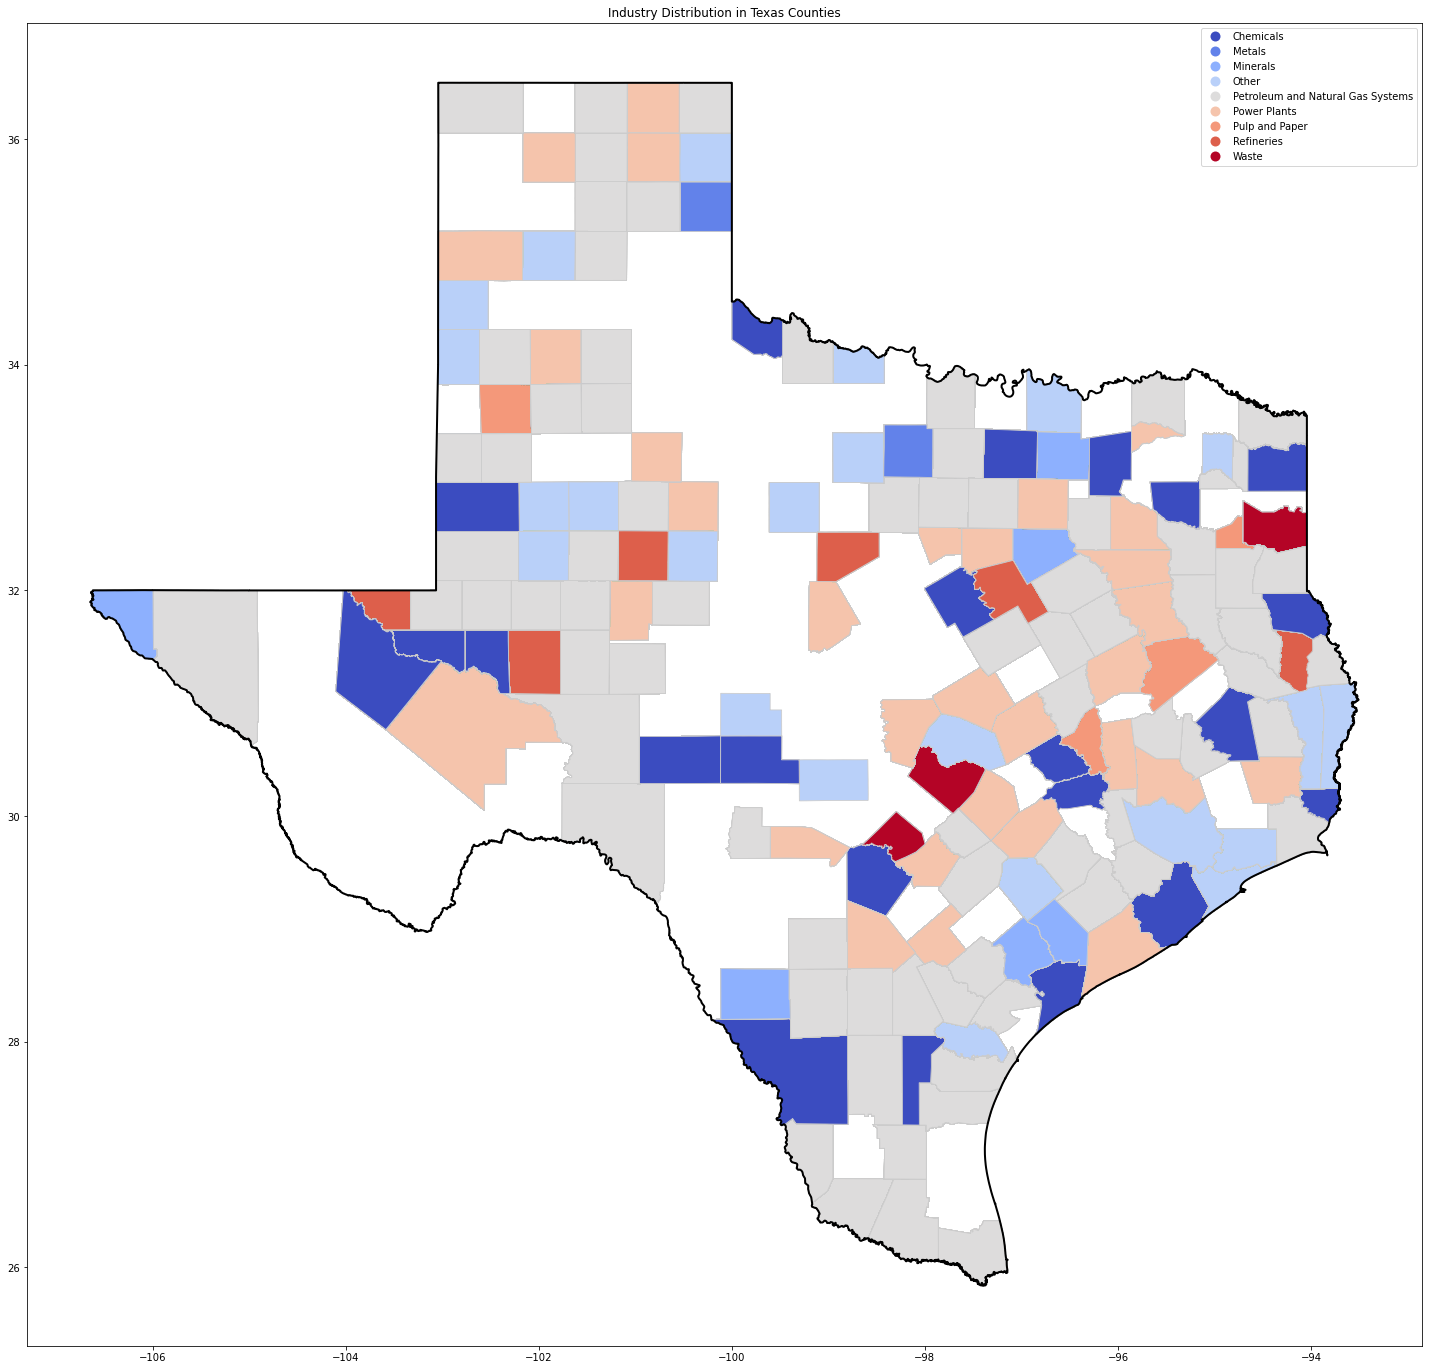

In [15]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

counties = gpd.read_file("C:/Users/charl/OneDrive - Worcester Polytechnic Institute (wpi.edu)/Desktop/County.shp")
texas_data = pd.read_csv("C:/Users/charl/OneDrive - Worcester Polytechnic Institute (wpi.edu)/Desktop/texas_fuelcsv.csv")
merged_data = counties.merge(texas_data, left_on='CNTY_NM', right_on='CNTY_NM')

fig, ax = plt.subplots(1, 1, figsize=(25, 25))
merged_data.plot(column='Industry Type (sectors)', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Industry Distribution in Texas Counties')

texas_boundary_shape = gpd.read_file("C:/Users/charl/OneDrive - Worcester Polytechnic Institute (wpi.edu)/Desktop/State.shp")
texas_boundary_shape.boundary.plot(ax=ax, linewidth=2, color='black')
plt.show()

